In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [7]:
fpath = "../out/atm.nc"
ds = nc.Dataset(fpath)

In [8]:
wlwn = lambda x: 1.0e7/(x-1.0e-20)

In [25]:
def ncdf_spec(ds):

    out = {}

    # bin edges [nm]
    soc_wl_up = ds["bandmax"][:] * 1e9
    soc_wl_lo = ds["bandmin"][:] * 1e9

    # bin edges [cm-1]
    soc_wn_lo = np.array(wlwn(soc_wl_up))
    soc_wn_up = np.array(wlwn(soc_wl_lo))

    # bin widths [cm-1]
    soc_wn_w = soc_wn_up - soc_wn_lo

    # bin centres [cm-1]
    soc_wn_c = 0.5*(soc_wn_up + soc_wn_lo)

    # get flux
    idx = 0
    soc_fl = np.array(ds["ba_U_LW"][idx,:]) # + ds["ba_U_SW"][idx,:] # W m-2
    soc_fl *= 1e3       # erg s-1 cm-2
    soc_fl /= soc_wn_w  # erg s-1 cm-2 /(cm-1)

    # convert to ascending order of wavenumber
    if soc_wn_c[21] < soc_wn_c[20]:
        soc_fl   = soc_fl[::-1]
        soc_wn_c = soc_wn_c[::-1]

    out["soc_wn"] = soc_wn_c
    out["soc_fl"] = soc_fl

    # RFM data
    out["rfm_wn"] = ds["rfm_wn"][:]
    out["rfm_fl"] = ds["rfm_fl"][:]

    return out

In [26]:
dat = ncdf_spec(ds)

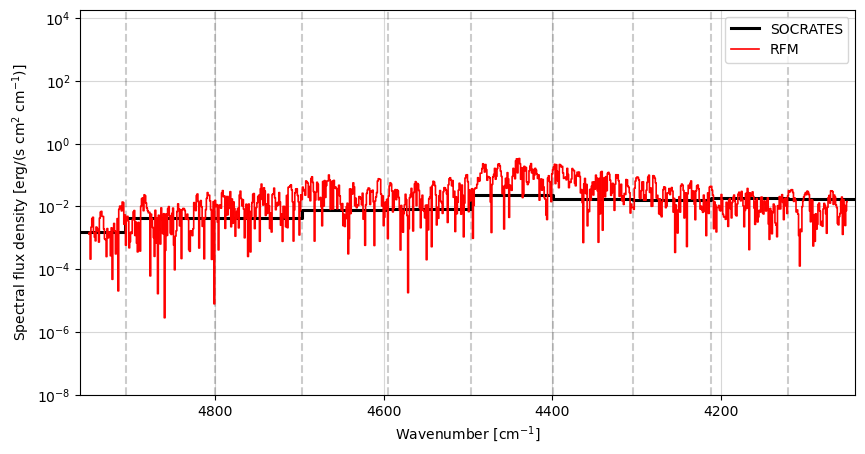

In [30]:
fig,ax = plt.subplots(1,1, figsize=(10,5))

ax.step(dat["soc_wn"],dat["soc_fl"], label="SOCRATES", zorder=5, where='mid', color='black', lw=2.2)
ax.step(dat["rfm_wn"],dat["rfm_fl"], label="RFM",      zorder=6, where='mid', color='red',   lw=1.2)

for b in ds["bandmin"]:
    ax.axvline(x=wlwn(b*1e9), color='black', zorder=2, ls='dashed', alpha=0.2)

ax.set_xlim(left=np.amax(dat["rfm_wn"])+10, right=np.amin(dat["rfm_wn"])-10)
ax.set_xlabel(r"Wavenumber [cm$^{-1}$]")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-8)
ax.set_ylabel(r"Spectral flux density [erg/(s cm$^2$ cm$^{-1}$)]")

ax.legend()
ax.grid(zorder=-2, alpha=0.5)

plt.show()